In [11]:
import os
#加载训练数据集
base_dir = '/home/liangyi/workplace/python/MachineLearning/NeuralNetwork/cat-and-dog/'
train_cat_dir = os.path.join(base_dir, 'training_set/cats')
train_dog_dir = os.path.join(base_dir, 'training_set/dogs')
test_cat_dir = os.path.join(base_dir, 'test_set/cats')
test_dog_dir = os.path.join(base_dir, 'test_set/dogs')
#显示两个数据集的图片数
print('quantity of train_cat_dir:',len(os.listdir(train_cat_dir)))
print('quantity of train_dog_dir:',len(os.listdir(train_dog_dir)))
print('quantity of test_cat_dir:',len(os.listdir(test_cat_dir)))
print('quantity of test_dog_dir:',len(os.listdir(test_dog_dir)))

quantity of train_cat_dir: 4001
quantity of train_dog_dir: 4006
quantity of test_cat_dir: 1012
quantity of test_dog_dir: 1013


In [12]:
#设置CNN，（150，150，3），32，64，128，128，512，1
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [13]:
from keras import preprocessing
import numpy as np 

#将图片加载到内存中
path_cats = []
for path in os.listdir(train_cat_dir):
    if '.jpg' in path:
        path_cats.append(os.path.join(train_cat_dir, path))
path_dogs = []
for path in os.listdir(train_dog_dir):
    if '.jpg' in path:
        path_dogs.append(os.path.join(train_dog_dir, path))

#将training图片转换为（150，150）的二维数组.猫3000张，狗3000张
training_set = np.zeros((6000,150,150,3), dtype='float32')
train_dog_imgs = 3000
train_cat_imgs = 3000
for i in range(train_dog_imgs):
    img = preprocessing.image.load_img(path_dogs[i], target_size = (150,150))
    training_set[i] = preprocessing.image.img_to_array(img)
for j in range(train_cat_imgs):
    img = preprocessing.image.load_img(path_cats[j], target_size = (150,150))
    training_set[j+train_dog_imgs] = preprocessing.image.img_to_array(img)
#准备2000张图片作为val_set,猫狗各1000张
val_set = np.zeros((2000,150,150,3), dtype='float32')
val_dog_imgs = 1000
val_cat_imgs = 1000
for i in range(val_dog_imgs):
    path = path_dogs[i+train_dog_imgs]
    img = preprocessing.image.load_img(path, target_size = (150,150))
    val_set[i] = preprocessing.image.img_to_array(img)
for j in range(val_cat_imgs):
    path = path_cats[j+train_cat_imgs]
    img = preprocessing.image.load_img(path, target_size = (150,150))
    val_set[j+val_cat_imgs] = preprocessing.image.img_to_array(img)




In [14]:
#设置猫狗图片的标签，狗为1，猫为0
train_labels = np.zeros((3000, ))
train_labels = np.concatenate((train_labels, np.ones(3000, )))
val_labels = np.zeros((1000,))
val_labels = np.concatenate((val_labels, np.ones(1000, )))

In [15]:
#将图片的像素转换到[0,1]之间
train_datagen = preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow(training_set, train_labels, batch_size = 32)
val_generator = train_datagen.flow(val_set, val_labels, batch_size = 32)

In [16]:
#启动网络，训练30次，每次从数据生成器中选取100张图片，校验时从生成器中选取50张图片
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_steps = 50, validation_data = val_generator)


Epoch 1/30
/home/liangyi/anaconda3/envs/keras/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
100/100 [==============================] - 50s 492ms/step - loss: 1.1658 - acc: 0.5218 - val_loss: 0.8944 - val_acc: 0.4950
Epoch 2/30
100/100 [==============================] - 48s 481ms/step - loss: 0.7058 - acc: 0.5495 - val_loss: 0.6552 - val_acc: 0.5944
Epoch 3/30
100/100 [==============================] - 48s 480ms/step - loss: 0.6769 - acc: 0.6105 - val_loss: 0.6324 - val_acc: 0.6575
Epoch 4/30
100/100 [==============================] - 47s 467ms/step - loss: 0.6095 - acc: 0.6889 - val_loss: 0.5865 - val_acc: 0.6888
Epoch 5/30
100/100 [==============================] - 48s 485ms/step - loss: 0.5621 - acc: 0.7120 - val_loss: 0.5289 - val_acc: 0.7500
Epoch 6/30
10

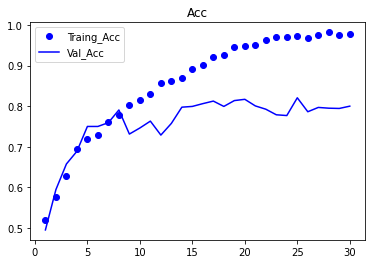

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt 
#获取训练结果，train的acc和val的acc
train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'bo', label = 'Traing_Acc')
plt.plot(epochs, val_acc, 'b', label = 'Val_Acc')
plt.title('Acc')
plt.legend()
plt.figure()
plt.show()


